In [ ]:
## DDPM requires a folder of images
%cd C:/Users/realc/OneDrive/Documents/GSOC

import numpy as np
import h5py
import os
from PIL import Image
import matplotlib.pyplot as plt

channel = 1
filename = f"data/QG{channel}_normalized_16x16_100k"
data_X, data_y = np.array(h5py.File(filename, "r")['X']), np.array(h5py.File(filename, "r")['y'])

n = 10000

save_dir = f"data/QG{channel}_16x16_images"
os.makedirs(save_dir, exist_ok=True)

for sample in range(n):
    image = data_X[sample]
    image_pil = Image.fromarray(image.astype(np.uint8))
    save_path = os.path.join(save_dir, f"sample_{sample}.png")
    image_pil.save(save_path)

print(f"Successfully saved {n} images.")

c:\Users\realc\OneDrive\Documents\GSOC\.venv\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


C:\Users\realc\OneDrive\Documents\GSOC
Successfully saved 500 images.


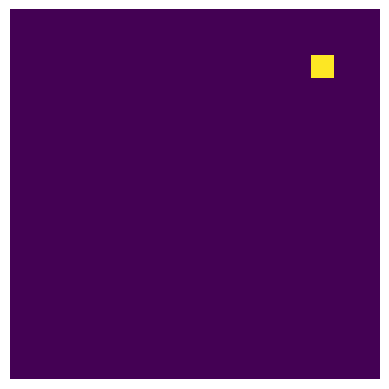

In [17]:
save_dir = f"data/QG1_16x16_images"
sample_index = 0

image_path = os.path.join(save_dir, f"sample_{sample_index}.png")
image = Image.open(image_path)

plt.imshow(image)
plt.axis('off')
plt.show()

In [3]:
from denoising_diffusion_pytorch import Unet, GaussianDiffusion, Trainer

model = Unet(
    dim = 64,
    dim_mults = (1, 2, 4, 8),
    flash_attn = True
)

diffusion = GaussianDiffusion(
    model,
    image_size = 16,
    timesteps = 1000,           # number of steps
    sampling_timesteps = 250    # number of sampling timesteps (using ddim for faster inference [see citation for ddim paper])
)

trainer = Trainer(
    diffusion,
    'data/QG1_16x16_images',
    train_batch_size = 32,
    train_lr = 8e-5,
    train_num_steps = 7000,         # total training steps
    gradient_accumulate_every = 2,    # gradient accumulation steps
    ema_decay = 0.995,                # exponential moving average decay
    amp = True,                       # turn on mixed precision
    calculate_fid = True              # whether to calculate fid during training
)

trainer.train()

c:\Users\realc\OneDrive\Documents\GSOC\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
  0%|          | 0/7000 [00:00<?, ?it/s]C:\Users\realc\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:105: FutureWarning: `torch.backends.cuda.sdp_kernel()` is deprecated. In the future, this context manager will be removed. Please see `torch.nn.attention.sdpa_kernel()` for the new context manager, with updated signature.
  self.gen = func(*args, **kwds)
loss: 0.3532:   0%|          | 24/7000 [04:13<20:27:14, 10.56s/it]


KeyboardInterrupt: 